In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_purchase_data.csv')

# Basic EDA

In [4]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
df.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
df.shape

(1500, 9)

In [8]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [9]:
# Data Cleaning

In [10]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [11]:
# Observation: There are no null values

In [12]:
df[df.duplicated()]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
243,57,1,79069.053493,8,4,43.221622,0,2,0
271,43,0,101042.774561,14,4,1.596751,0,5,0
299,65,1,55499.205296,20,4,12.778100,0,5,0
304,50,0,41425.926045,6,0,29.865093,1,2,0
306,56,1,48679.553852,17,1,10.110530,0,3,0
...,...,...,...,...,...,...,...,...,...
1461,67,1,110466.885362,17,0,43.108669,0,1,0
1484,68,0,80311.223269,14,2,19.080098,0,3,0
1485,21,1,120794.999552,10,0,7.630770,0,2,0
1492,63,0,71874.591294,10,2,43.546243,0,1,0


In [13]:
# Deleting Duplicated Rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)
df.shape

(1388, 9)

In [14]:
## Observation : There was 112 Duplicated vales  and we removed them

In [15]:
# Handling Outliers

<Axes: >

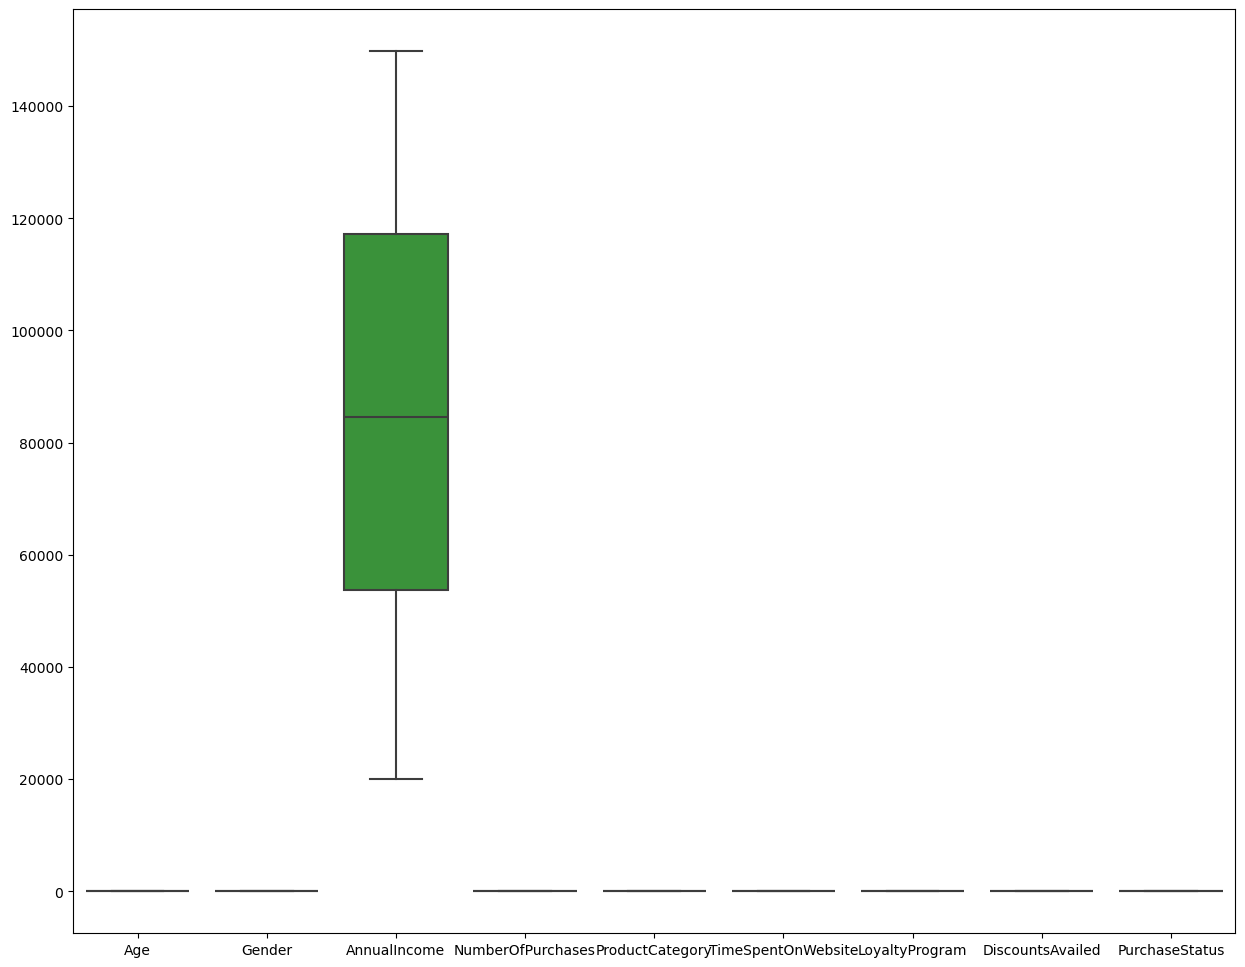

In [16]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df)

In [17]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in Age attribute: []
Outliers in Gender attribute: []
Outliers in AnnualIncome attribute: []
Outliers in NumberOfPurchases attribute: []
Outliers in ProductCategory attribute: []
Outliers in TimeSpentOnWebsite attribute: []
Outliers in LoyaltyProgram attribute: []
Outliers in DiscountsAvailed attribute: []
Outliers in PurchaseStatus attribute: []


In [19]:
#There are no outliers

In [24]:
# Univarient 

In [30]:
def bar_pie_plot(target_variable):
    # Count the occurrences of each gender using Seaborn
    counts = sns.countplot(x=df[target_variable])

    # Extract the counts from the Seaborn plot (just to demonstrate the method)
    counts_data = df[target_variable].value_counts()

    # Create a pie chart using the counts
    plt.figure(figsize=(6, 6))
    plt.pie(counts_data, labels=counts_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f' {target_variable}  Distribution')
    plt.show()

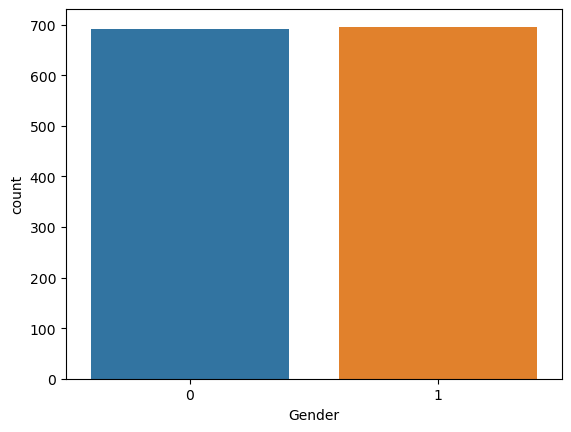

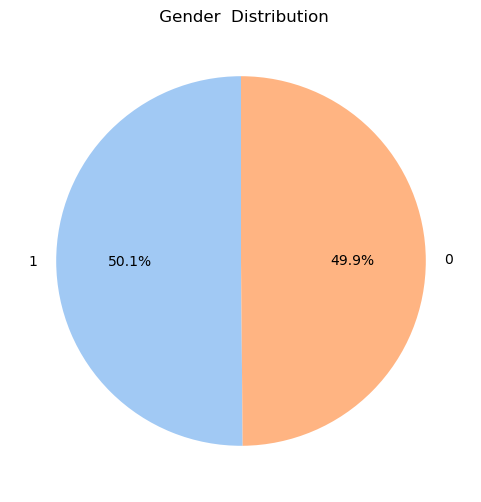

In [31]:
bar_pie_plot('Gender')

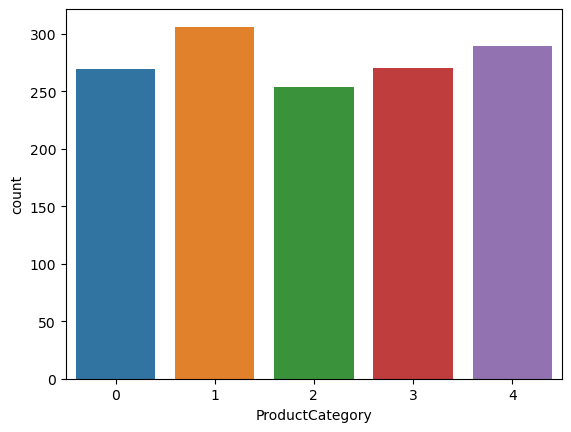

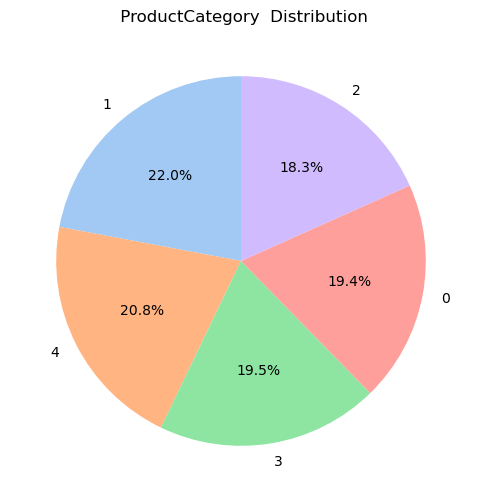

In [33]:
bar_pie_plot('ProductCategory')

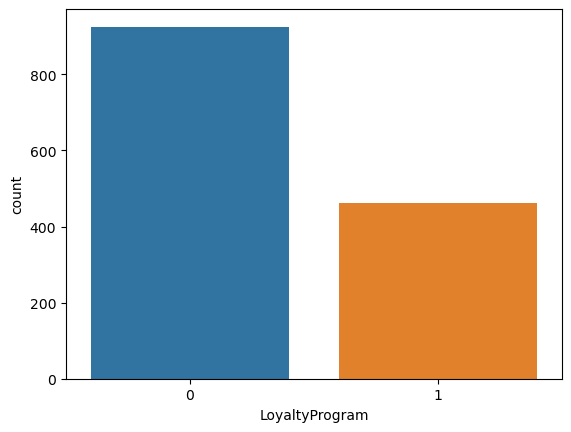

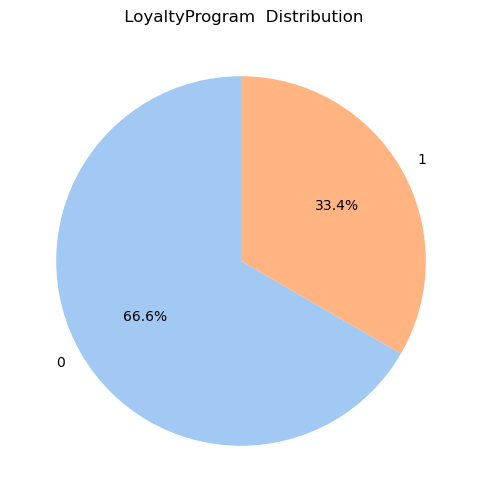

In [34]:
bar_pie_plot('LoyaltyProgram')

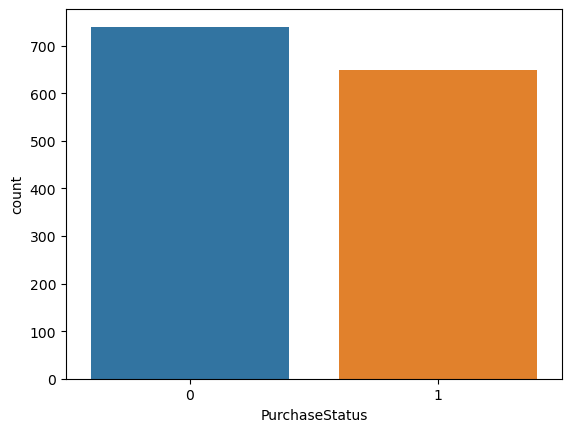

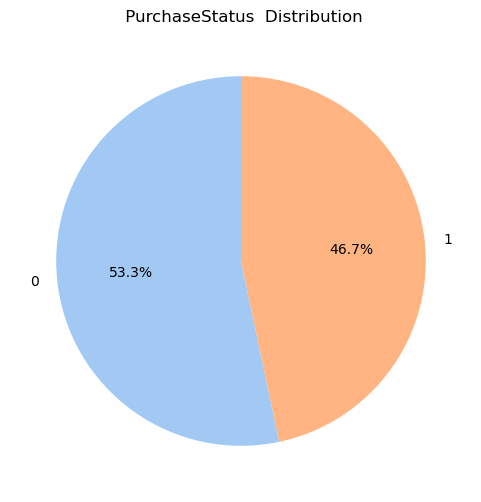

In [35]:
bar_pie_plot('PurchaseStatus')

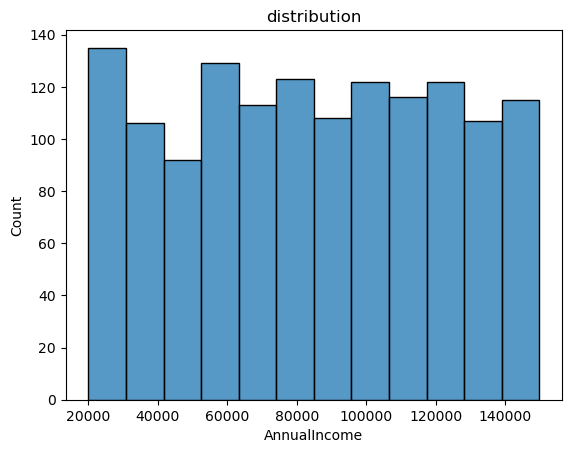

In [36]:
sns.histplot(df.AnnualIncome)
plt.title('distribution')
plt.show()

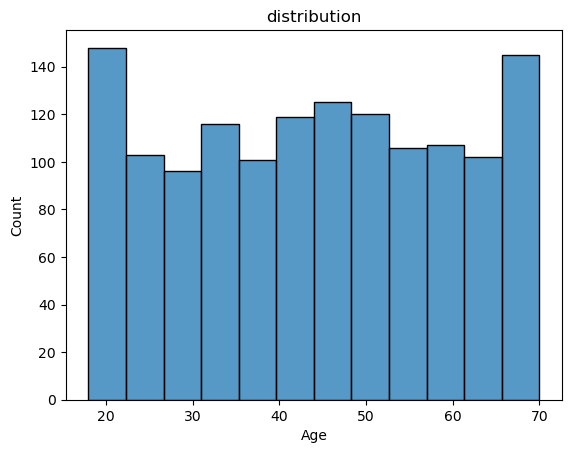

In [37]:
sns.histplot(df.Age)
plt.title('distribution')
plt.show()

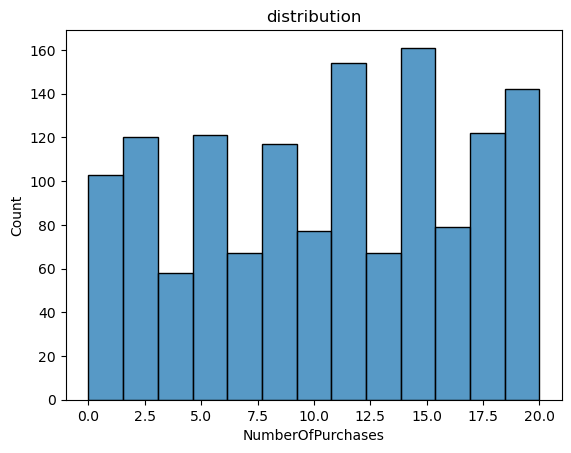

In [38]:
sns.histplot(df.NumberOfPurchases)
plt.title('distribution')
plt.show()

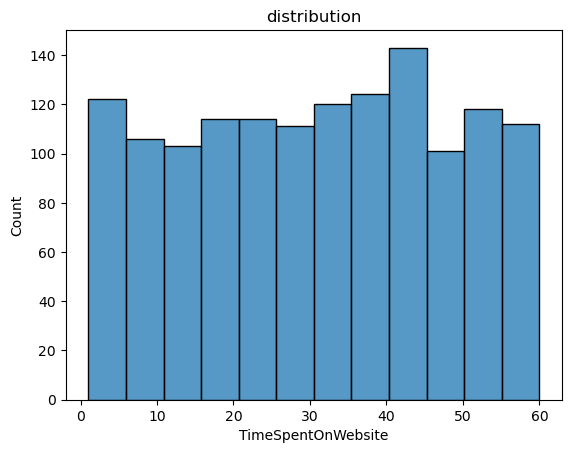

In [39]:
sns.histplot(df.TimeSpentOnWebsite)
plt.title('distribution')
plt.show()

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
X = df.drop(columns=['PurchaseStatus'])  # Features
y = df['PurchaseStatus']  # Target variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.84      0.84      0.84       129

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.86      0.86      0.86       278

Confusion Matrix:
[[129  20]
 [ 20 109]]
